In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diagnoses_icd_combined.csv',low_memory=False)   

# Function to ensure temperatures are between 56.7°F and 107.6°F
def convert_temperature(x):
    if x < 56.7:  # Likely in Celsius, convert to Fahrenheit
        x = x * 1.8 + 32
    elif x > 107.6:  # Likely in Fahrenheit, convert to Celsius and then back to Fahrenheit within range
        x = (x - 32) / 1.8
        x = x * 1.8 + 32
    
    # Ensure temperature is within 56.7°F and 107.6°F
    if x < 56.7:
        return 56.7
    elif x > 107.6:
        return 107.6
    else:
        return x

# Apply the conversion function
df['temperature'] = df['temperature'].apply(convert_temperature)

# Check the new min and max values
min_temp, max_temp = df['temperature'].min(), df['temperature'].max()
min_temp, max_temp

(56.7, 107.6)

In [2]:
df_patients= pd.read_csv('patients.csv',low_memory=False)   

In [3]:
# Consider the 'subject_id' where 'anchor_age' is between 18 and 88
df_patients = df_patients[(df_patients['anchor_age'] >= 18) & (df_patients['anchor_age'] <= 88)]

# Check the new min and max values
min_age, max_age = df_patients['anchor_age'].min(), df_patients['anchor_age'].max()
min_age, max_age

(18, 88)

In [4]:
df_common = df[df['subject_id'].isin(df_patients['subject_id'])]
df_common.columns==df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
# Save to diagnoses_icd_combined.csv
df_common.to_csv('diagnoses_icd_combined_age_restricted.csv', index=False)

In [6]:
df=df_common

In [7]:
# Create separate dataframes based on the 'Pneumonia Detected' column
df_pneumonia_detected = df[df['Pneumonia Detected'] == 1]
df_pneumonia_not_detected = df[df['Pneumonia Detected'] == 0]

# Rename the columns in the df_pneumonia_detected dataframes 'temperature', 'heartrate', 'resprate', 'o2sat' to 'Temperature VAP', 'Heart Rate VAP', 'Respiratory Rate VAP', 'SpO2 VAP' 
df_pneumonia_detected.rename(columns={'temperature': 'Temperature VAP', 'heartrate': 'Heart Rate VAP', 'resprate': 'Respiratory Rate VAP', 'o2sat': 'SpO2 VAP'}, inplace=True)

# Rename the columns in the df_pneumonia_not_detected dataframes 'temperature', 'heartrate', 'resprate', 'o2sat' to 'Temperature No VAP', 'Heart Rate No VAP', 'Respiratory Rate No VAP', 'SpO2 No VAP'
df_pneumonia_not_detected.rename(columns={'temperature': 'Temperature No VAP', 'heartrate': 'Heart Rate No VAP', 'resprate': 'Respiratory Rate No VAP', 'o2sat': 'SpO2 No VAP'}, inplace=True)

# Save these dataframes to new CSV files if needed
df_pneumonia_detected.to_csv('VAP detected.csv', index=False)
df_pneumonia_not_detected.to_csv('No VAP detected.csv', index=False)

/tmp/ipykernel_11801/2710633593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pneumonia_detected.rename(columns={'temperature': 'Temperature VAP', 'heartrate': 'Heart Rate VAP', 'resprate': 'Respiratory Rate VAP', 'o2sat': 'SpO2 VAP'}, inplace=True)
/tmp/ipykernel_11801/2710633593.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pneumonia_not_detected.rename(columns={'temperature': 'Temperature No VAP', 'heartrate': 'Heart Rate No VAP', 'resprate': 'Respiratory Rate No VAP', 'o2sat': 'SpO2 No VAP'}, inplace=True)


In [8]:
# Create separate dataframes based on the 'Pneumonia Detected' column
df_pneumonia_detected = df[df['Pneumonia Detected'] == 1]
df_pneumonia_not_detected = df[df['Pneumonia Detected'] == 0]

# Rename the columns in the df_pneumonia_detected dataframes 'temperature', 'heartrate', 'resprate', 'o2sat' to 'Temperature VAP', 'Heart Rate VAP', 'Respiratory Rate VAP', 'SpO2 VAP' 
df_pneumonia_detected.rename(columns={'temperature': 'Temperature VAP', 'heartrate': 'Heart Rate VAP', 'resprate': 'Respiratory Rate VAP', 'o2sat': 'SpO2 VAP'}, inplace=True)

# Rename the columns in the df_pneumonia_not_detected dataframes 'temperature', 'heartrate', 'resprate', 'o2sat' to 'Temperature No VAP', 'Heart Rate No VAP', 'Respiratory Rate No VAP', 'SpO2 No VAP'
df_pneumonia_not_detected.rename(columns={'temperature': 'Temperature No VAP', 'heartrate': 'Heart Rate No VAP', 'resprate': 'Respiratory Rate No VAP', 'o2sat': 'SpO2 No VAP'}, inplace=True)

# Save these dataframes to new CSV files if needed
df_pneumonia_detected.to_csv('VAP detected.csv', index=False)
df_pneumonia_not_detected.to_csv('No VAP detected.csv', index=False)

/tmp/ipykernel_11801/2710633593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pneumonia_detected.rename(columns={'temperature': 'Temperature VAP', 'heartrate': 'Heart Rate VAP', 'resprate': 'Respiratory Rate VAP', 'o2sat': 'SpO2 VAP'}, inplace=True)
/tmp/ipykernel_11801/2710633593.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pneumonia_not_detected.rename(columns={'temperature': 'Temperature No VAP', 'heartrate': 'Heart Rate No VAP', 'resprate': 'Respiratory Rate No VAP', 'o2sat': 'SpO2 No VAP'}, inplace=True)


In [9]:
# List the unique subject_id values in the df_pneumonia_detected dataframe and df_pneumonia_not_detected dataframe
unique_subjects_detected = df_pneumonia_detected['subject_id'].unique()
unique_subjects_not_detected = df_pneumonia_not_detected['subject_id'].unique()

In [10]:
# Create an empty dataframe df_pneumonia_detected_unique with columns 'subject_id', 'Count'
df_pneumonia_detected_unique = pd.DataFrame(columns=['subject_id', 'Count'])

# Create an empty dataframe df_pneumonia_not_detected_unique with columns 'subject_id', 'Count'
df_pneumonia_not_detected_unique = pd.DataFrame(columns=['subject_id', 'Count'])

# Ensure unique_subjects_detected is a list or array of unique subject IDs
unique_subjects_detected = df_pneumonia_detected['subject_id'].unique()

# Add the unique subject_id values and the count of each subject_id to the df_pneumonia_detected_unique dataframe
df_pneumonia_detected_unique['subject_id'] = unique_subjects_detected
df_pneumonia_detected_unique['Count'] = df_pneumonia_detected['subject_id'].value_counts().reindex(unique_subjects_detected).values

# Ensure unique_subjects_not_detected is a list or array of unique subject IDs
unique_subjects_not_detected = df_pneumonia_not_detected['subject_id'].unique()

# Add the unique subject_id values and the count of each subject_id to the df_pneumonia_not_detected_unique dataframe
df_pneumonia_not_detected_unique['subject_id'] = unique_subjects_not_detected
df_pneumonia_not_detected_unique['Count'] = df_pneumonia_not_detected['subject_id'].value_counts().reindex(unique_subjects_not_detected).values

# Save these dataframes to new CSV files
df_pneumonia_detected_unique.to_csv('VAP detected unique.csv', index=False)
df_pneumonia_not_detected_unique.to_csv('No VAP detected unique.csv', index=False)

In [11]:
# Drop NaN values
df_pneumonia_detected=df_pneumonia_detected.dropna()
df_pneumonia_not_detected=df_pneumonia_not_detected.dropna()
data=df_common.dropna()
data=data

In [12]:
from sklearn.preprocessing import StandardScaler

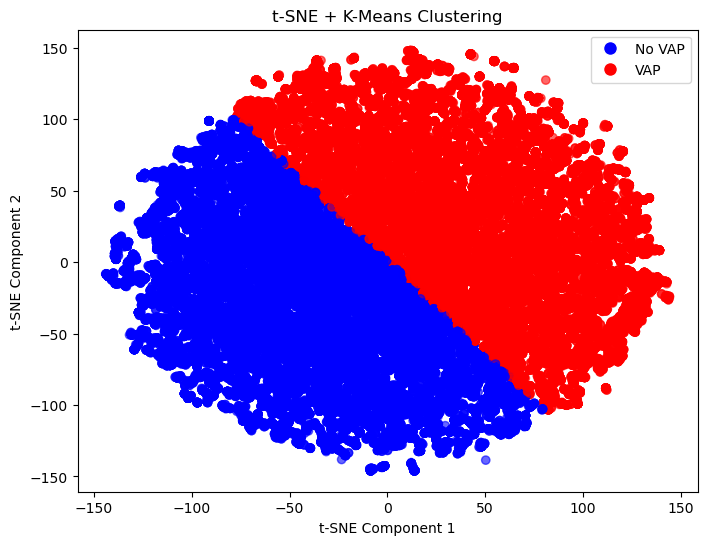

In [13]:
# Import t-SNE from sklearn
from sklearn.manifold import TSNE

# Drop NaN values
df_pneumonia_detected = df_pneumonia_detected.dropna()
df_pneumonia_not_detected = df_pneumonia_not_detected.dropna()
data = df_common.dropna()

# Features (vital parameters) and target (VAP)
X = data[['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp']]
y = data['Pneumonia Detected']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform t-SNE, reducing to 2 components
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
### Apply K-Means Clustering (using t-SNE components)
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
tsne_clusters = kmeans_tsne.fit_predict(X_tsne)

# Define colors for clusters
colors = {0: 'blue', 1: 'red'}

### Plot t-SNE + K-Means
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=[colors[label] for label in tsne_clusters], alpha=0.6)
plt.title('t-SNE + K-Means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
# Removed plt.colorbar(label='Cluster')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No VAP'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='VAP')],
           loc='best')
plt.savefig('t-SNE + K-Means VAP No VAP.png', dpi=300)
plt.show()

/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 

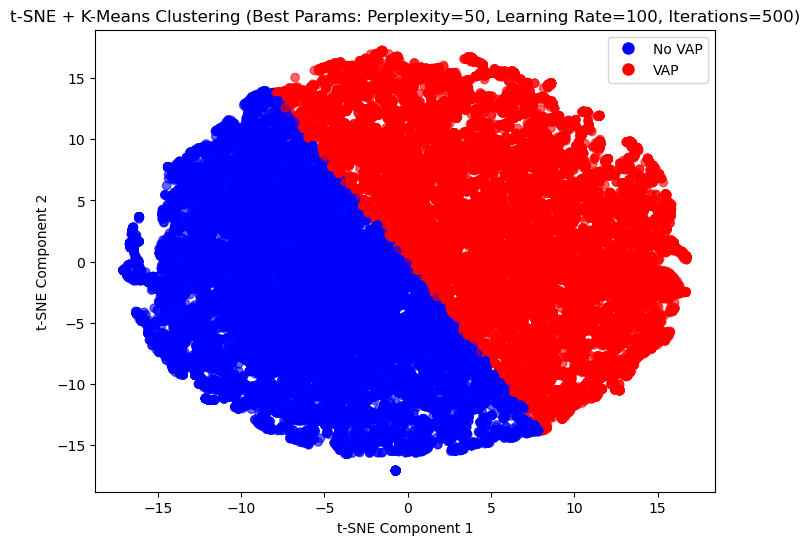

Best t-SNE parameters found: {'perplexity': 50, 'learning_rate': 100, 'n_iter': 500}


In [14]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop NaN values
df_pneumonia_detected = df_pneumonia_detected.dropna()
df_pneumonia_not_detected = df_pneumonia_not_detected.dropna()
data = df_common.dropna()

# Features (vital parameters) and target (VAP)
X = data[['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp']]
y = data['Pneumonia Detected']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter ranges for tuning
perplexities = [10, 30, 50]
learning_rates = [100, 200, 500]
iterations = [500, 1000]

# Best score and settings
best_score = -np.inf
best_tsne_params = {}

# Loop over hyperparameter combinations
for perplexity in perplexities:
    for learning_rate in learning_rates:
        for n_iter in iterations:
            # Perform t-SNE with hyperparameters
            tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
            X_tsne = tsne.fit_transform(X_scaled)
            
            # Apply K-Means Clustering (using t-SNE components)
            kmeans_tsne = KMeans(n_clusters=2, random_state=42)
            tsne_clusters = kmeans_tsne.fit_predict(X_tsne)
            
            # Calculate separation score (e.g., inertia from KMeans)
            score = kmeans_tsne.inertia_  # Lower inertia indicates better cluster separation
            
            if score < best_score or best_score == -np.inf:
                best_score = score
                best_tsne_params = {'perplexity': perplexity, 'learning_rate': learning_rate, 'n_iter': n_iter}
                best_X_tsne = X_tsne
                best_tsne_clusters = tsne_clusters

# Define colors for clusters
colors = {0: 'blue', 1: 'red'}

### Plot the best t-SNE + K-Means
plt.figure(figsize=(8, 6))
scatter = plt.scatter(best_X_tsne[:, 0], best_X_tsne[:, 1], c=[colors[label] for label in best_tsne_clusters], alpha=0.6)
plt.title(f"t-SNE + K-Means Clustering (Best Params: Perplexity={best_tsne_params['perplexity']}, "
          f"Learning Rate={best_tsne_params['learning_rate']}, Iterations={best_tsne_params['n_iter']})")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No VAP'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='VAP')],
           loc='best')
plt.savefig('t-SNE + K-Means VAP No VAP 1.png', dpi=300)
plt.show()

# Print the best hyperparameters
print("Best t-SNE parameters found:", best_tsne_params)

/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 

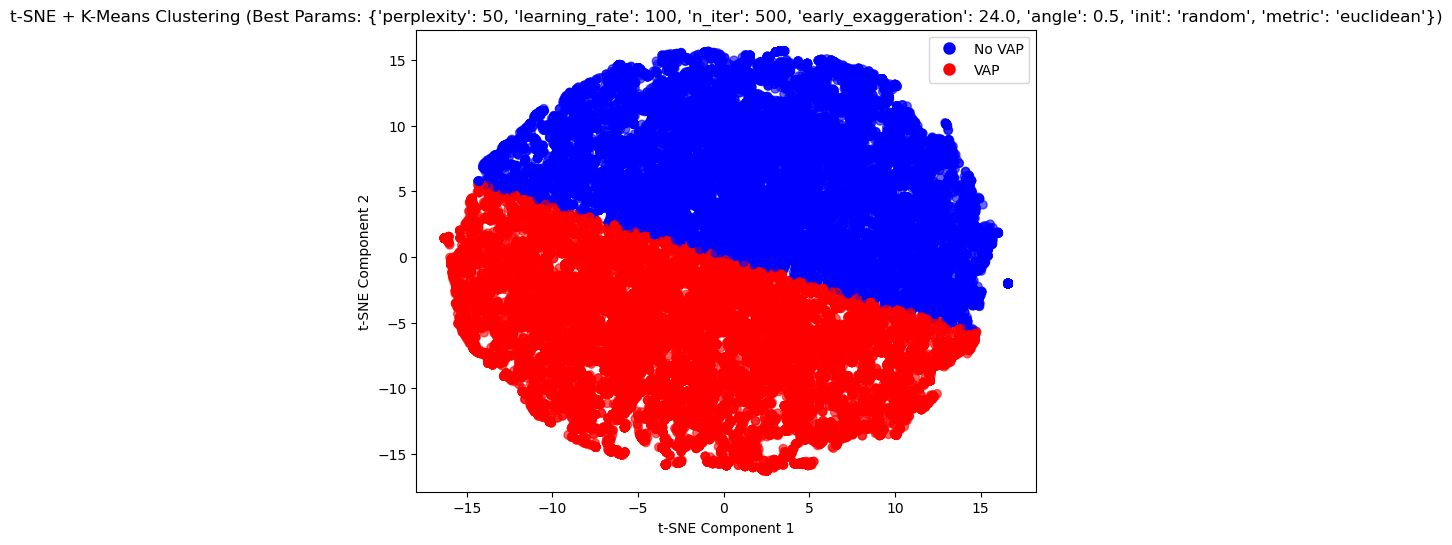

Best t-SNE parameters found: {'perplexity': 50, 'learning_rate': 100, 'n_iter': 500, 'early_exaggeration': 24.0, 'angle': 0.5, 'init': 'random', 'metric': 'euclidean'}


In [15]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop NaN values
df_pneumonia_detected = df_pneumonia_detected.dropna()
df_pneumonia_not_detected = df_pneumonia_not_detected.dropna()
data = df_common.dropna()

# Features (vital parameters) and target (VAP)
X = data[['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp']]
y = data['Pneumonia Detected']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter ranges for tuning
perplexities = [10, 30, 50]  # Tuning perplexity
learning_rates = [100, 200, 500]  # Tuning learning rate
iterations = [500, 1000]  # Tuning number of iterations
early_exaggerations = [12.0, 24.0]  # Tuning early exaggeration
angles = [0.2, 0.5]  # Tuning angle for approximation vs accuracy
inits = ['random', 'pca']  # Tuning initialization method
metrics = ['euclidean', 'cosine']  # Tuning distance metric

# Best score and settings
best_score = -np.inf
best_tsne_params = {}

# Loop over all hyperparameter combinations
for perplexity in perplexities:
    for learning_rate in learning_rates:
        for n_iter in iterations:
            for early_exaggeration in early_exaggerations:
                for angle in angles:
                    for init in inits:
                        for metric in metrics:
                            # Perform t-SNE with hyperparameters
                            tsne = TSNE(n_components=2,
                                        perplexity=perplexity,
                                        learning_rate=learning_rate,
                                        n_iter=n_iter,
                                        early_exaggeration=early_exaggeration,
                                        angle=angle,
                                        init=init,
                                        metric=metric,
                                        random_state=42)
                            X_tsne = tsne.fit_transform(X_scaled)
                            
                            # Apply K-Means Clustering (using t-SNE components)
                            kmeans_tsne = KMeans(n_clusters=2, random_state=42)
                            tsne_clusters = kmeans_tsne.fit_predict(X_tsne)
                            
                            # Calculate separation score (e.g., inertia from KMeans)
                            score = kmeans_tsne.inertia_  # Lower inertia indicates better cluster separation
                            
                            if score < best_score or best_score == -np.inf:
                                best_score = score
                                best_tsne_params = {
                                    'perplexity': perplexity,
                                    'learning_rate': learning_rate,
                                    'n_iter': n_iter,
                                    'early_exaggeration': early_exaggeration,
                                    'angle': angle,
                                    'init': init,
                                    'metric': metric
                                }
                                best_X_tsne = X_tsne
                                best_tsne_clusters = tsne_clusters

# Define colors for clusters
colors = {0: 'blue', 1: 'red'}

### Plot the best t-SNE + K-Means
plt.figure(figsize=(8, 6))
scatter = plt.scatter(best_X_tsne[:, 0], best_X_tsne[:, 1], c=[colors[label] for label in best_tsne_clusters], alpha=0.6)
plt.title(f"t-SNE + K-Means Clustering (Best Params: {best_tsne_params})")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No VAP'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='VAP')],
           loc='best')
plt.savefig('t-SNE + K-Means VAP No VAP 2.png', dpi=300)
plt.show()

# Print the best hyperparameters
print("Best t-SNE parameters found:", best_tsne_params)

In [18]:
import cudf
import cuml
from cuml.manifold import TSNE as cumlTSNE
from cuml.cluster import KMeans as cumlKMeans
from cuml.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Don't forget to import pandas

# Ensure the data is loaded as pandas DataFrames
df_pneumonia_detected = pd.read_csv('VAP detected.csv')
df_pneumonia_not_detected = pd.read_csv('No VAP detected.csv')
df_common = pd.read_csv('diagnoses_icd_combined_age_restricted.csv')

# Convert pandas DataFrames to cuDF DataFrames
df_pneumonia_detected = cudf.DataFrame.from_pandas(df_pneumonia_detected)
df_pneumonia_not_detected = cudf.DataFrame.from_pandas(df_pneumonia_not_detected)
data = cudf.DataFrame.from_pandas(df_common)

# Features (vital parameters) and target (VAP)
X = data[['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp']]
y = data['Pneumonia Detected']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter ranges for tuning
perplexities = [10, 30, 50]  # Tuning perplexity
learning_rates = [100, 200, 500]  # Tuning learning rate
iterations = [500, 1000]  # Tuning number of iterations
early_exaggerations = [12.0, 24.0]  # Tuning early exaggeration
angles = [0.2, 0.5]  # Tuning angle for approximation vs accuracy
inits = ['random', 'pca']  # Tuning initialization method
metrics = ['euclidean', 'cosine']  # Tuning distance metric

# Best score and settings
best_score = np.inf
best_tsne_params = {}

# Loop over all hyperparameter combinations
for perplexity in perplexities:
    for learning_rate in learning_rates:
        for n_iter in iterations:
            for early_exaggeration in early_exaggerations:
                for angle in angles:
                    for init in inits:
                        for metric in metrics:
                            # Perform t-SNE with hyperparameters
                            tsne = cumlTSNE(n_components=2,
                                            perplexity=perplexity,
                                            learning_rate=learning_rate,
                                            n_iter=n_iter,
                                            early_exaggeration=early_exaggeration,
                                            angle=angle,
                                            init=init,
                                            metric=metric,
                                            random_state=42)
                            X_tsne = tsne.fit_transform(X_scaled)

                            # Apply K-Means Clustering (using t-SNE components)
                            kmeans_tsne = cumlKMeans(n_clusters=2, random_state=42)
                            tsne_clusters = kmeans_tsne.fit_predict(X_tsne)

                            # Calculate separation score (e.g., inertia from KMeans)
                            score = kmeans_tsne.inertia_  # Lower inertia indicates better cluster separation

                            if score < best_score or best_score == np.inf:
                                best_score = score
                                best_tsne_params = {
                                    'perplexity': perplexity,
                                    'learning_rate': learning_rate,
                                    'n_iter': n_iter,
                                    'early_exaggeration': early_exaggeration,
                                    'angle': angle,
                                    'init': init,
                                    'metric': metric
                                }
                                best_X_tsne = X_tsne
                                best_tsne_clusters = tsne_clusters

# Define colors for clusters
colors = {0: 'blue', 1: 'red'}

### Plot the best t-SNE + K-Means
plt.figure(figsize=(8, 6))
scatter = plt.scatter(best_X_tsne[:, 0].to_array(), best_X_tsne[:, 1].to_array(), 
                     c=[colors[label] for label in best_tsne_clusters.to_array()], alpha=0.6)
plt.title(f"t-SNE + K-Means Clustering (Best Params: {best_tsne_params})")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No VAP'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='VAP')],
          loc='best')
plt.savefig('t-SNE + K-Means VAP No VAP.png', dpi=300)
plt.show()

# Print the best hyperparameters
print("Best t-SNE parameters found:", best_tsne_params)

/home/soumyabrata/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


RuntimeError: exception occurred! file=/home/soumyabrata/miniconda3/envs/rapids-24.08/include/raft/linalg/detail/eig.cuh line=151: 